In [1]:
import tensorflow as tf
from tensorflow.keras.utils import plot_model

https://keras.io/api/layers/regularizers/

In [15]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPooling2D, Flatten, Dropout

model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1), kernel_regularizer='l2'))
model.add(Dropout(0.1))
model.add(MaxPooling2D((2, 2)))
model.add(Flatten())
model.add(Dropout(0.2))
model.add(Dense(50, activation='relu', kernel_regularizer='l1'))
model.add(Dense(10,activation='softmax'))   # number of categories = 10, sigmoid 

model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_11 (Conv2D)          (None, 26, 26, 32)        320       
                                                                 
 dropout_5 (Dropout)         (None, 26, 26, 32)        0         
                                                                 
 max_pooling2d_10 (MaxPoolin  (None, 13, 13, 32)       0         
 g2D)                                                            
                                                                 
 flatten_9 (Flatten)         (None, 5408)              0         
                                                                 
 dropout_6 (Dropout)         (None, 5408)              0         
                                                                 
 dense_16 (Dense)            (None, 50)                270450    
                                                      

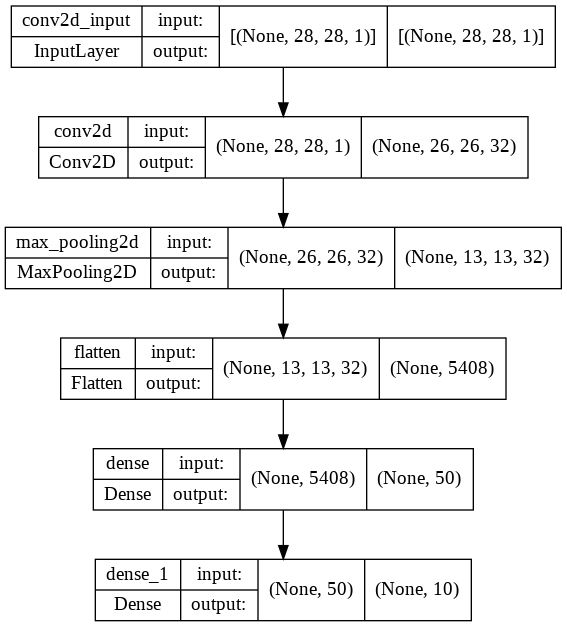

In [3]:
plot_model(model, to_file='m1.png', show_shapes=True, show_layer_names=True)

In [4]:
from tensorflow.keras import Model
from tensorflow.keras.layers import Input, Dense, Conv2D, MaxPooling2D, Flatten

inp = Input(shape=(28,28,1))
x = Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1))(inp)
x = MaxPooling2D((2, 2))(x)
x = Flatten()(x)
x = Dense(50, activation='relu')(x)
out = Dense(10,activation='softmax')(x)

model2 = Model(inputs= inp, outputs= out)

model2.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 28, 28, 1)]       0         
                                                                 
 conv2d_1 (Conv2D)           (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 13, 13, 32)       0         
 2D)                                                             
                                                                 
 flatten_1 (Flatten)         (None, 5408)              0         
                                                                 
 dense_2 (Dense)             (None, 50)                270450    
                                                                 
 dense_3 (Dense)             (None, 10)                510       
                                                             

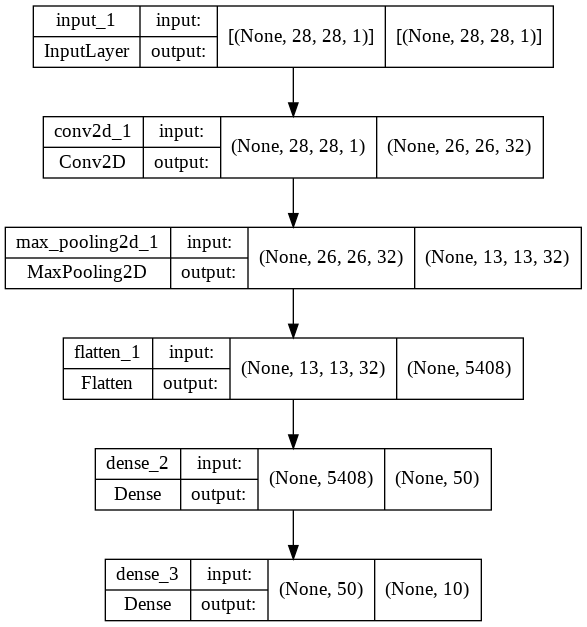

In [5]:
plot_model(model2, to_file='m2.png', show_shapes=True, show_layer_names=True)

In [8]:
from tensorflow.keras import Model
from tensorflow.keras.layers import Input, Dense, Conv2D, MaxPooling2D, Flatten, Concatenate

inp = Input(shape=(28,28,1))
x1 = Conv2D(32, (3, 3), activation='relu')(inp)
x1 = MaxPooling2D((2, 2))(x1)
x1 = Flatten()(x1)

x2 = Conv2D(16, (4, 4), activation='relu')(inp)
x2 = Conv2D(16, (2, 2), activation='relu')(x2)
x2 = MaxPooling2D((2, 2))(x2)
x2 = Flatten()(x2)

x = Concatenate()([x1, x2])
x = Dense(50, activation='relu')(x)
out = Dense(10,activation='softmax')(x)

model3 = Model(inputs= inp, outputs= out)

model3.summary()

Model: "model_2"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_3 (InputLayer)           [(None, 28, 28, 1)]  0           []                               
                                                                                                  
 conv2d_5 (Conv2D)              (None, 25, 25, 16)   272         ['input_3[0][0]']                
                                                                                                  
 conv2d_4 (Conv2D)              (None, 26, 26, 32)   320         ['input_3[0][0]']                
                                                                                                  
 conv2d_6 (Conv2D)              (None, 24, 24, 16)   1040        ['conv2d_5[0][0]']               
                                                                                            

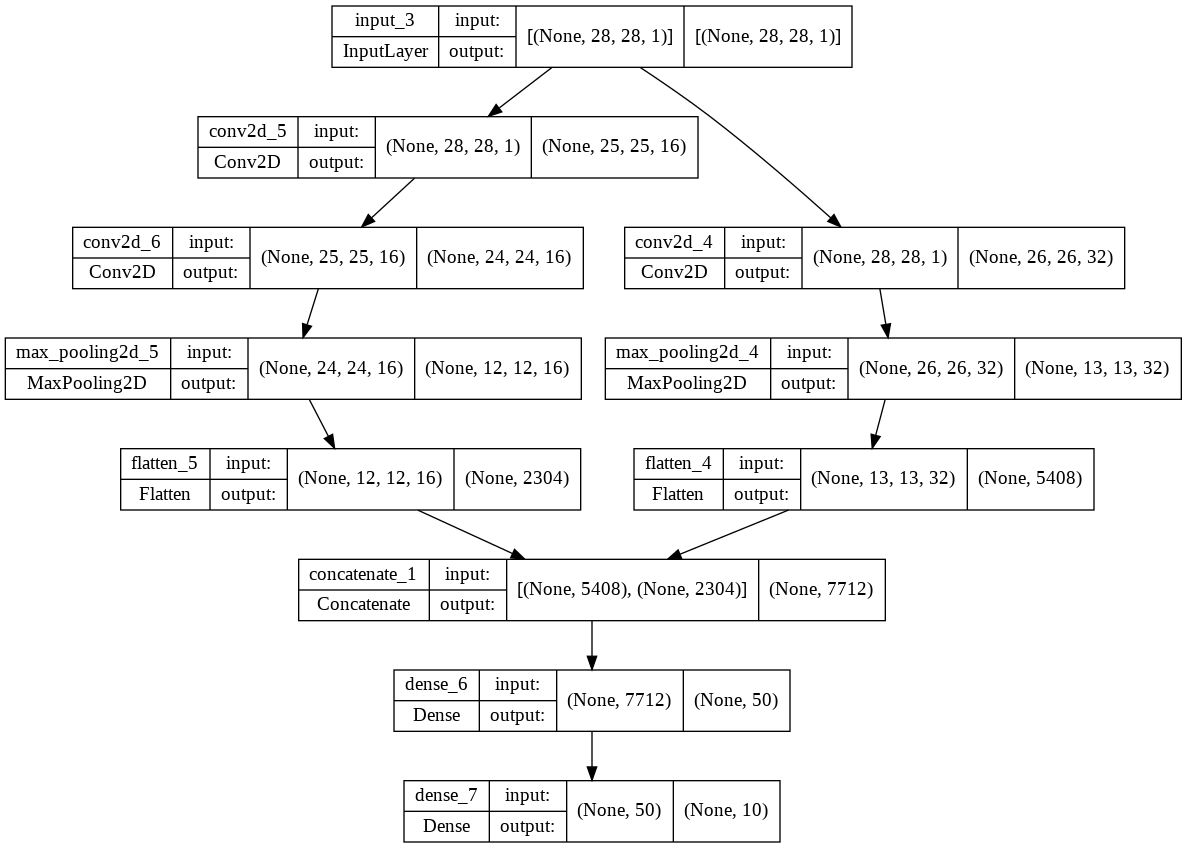

In [9]:
plot_model(model3, to_file='m3.png', show_shapes=True, show_layer_names=True)

In [10]:
from tensorflow.keras import Model
from tensorflow.keras.layers import Input, Dense, Conv2D, MaxPooling2D, Flatten, Concatenate

inp = Input(shape=(28,28,1))
x = Conv2D(32, (3, 3), activation='relu')(inp)
x = MaxPooling2D((2, 2))(x)
x = Flatten()(x)

x1 = Dense(50, activation='relu')(x)
out1 = Dense(10,activation='softmax')(x1)

x2 = Dense(64, activation='relu')(x)
out2 = Dense(5,activation='softmax')(x2)

model4 = Model(inputs= inp, outputs= [out1, out2])

model4.summary()

Model: "model_3"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_4 (InputLayer)           [(None, 28, 28, 1)]  0           []                               
                                                                                                  
 conv2d_7 (Conv2D)              (None, 26, 26, 32)   320         ['input_4[0][0]']                
                                                                                                  
 max_pooling2d_6 (MaxPooling2D)  (None, 13, 13, 32)  0           ['conv2d_7[0][0]']               
                                                                                                  
 flatten_6 (Flatten)            (None, 5408)         0           ['max_pooling2d_6[0][0]']        
                                                                                            

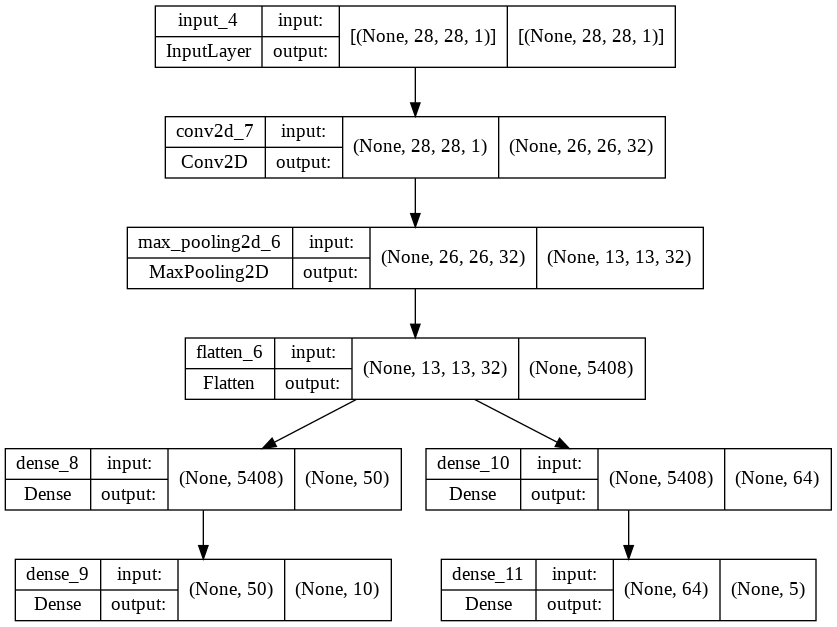

In [11]:
plot_model(model4, to_file='m4.png', show_shapes=True, show_layer_names=True)